In [0]:
import os; os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/Markov Models')

In [0]:
import string
import numpy as np
import matplotlib.pyplot as plt
from hmm_discrete_in_theano import HMM
from sklearn.utils import shuffle
from nltk import pos_tag, word_tokenize

In [0]:
class HMMClassifier:
    def __init__(self):
        pass

    def fit(self, X, Y, V):
        K = len(set(Y)) #number of classes
        N = len(Y)
        self.models = []
        self.priors = []
        for k in range(K):
            #gather all the training data for this class
            thisX = [x for x, y in zip(X,Y) if y==k]
            C = len(thisX)
            self.priors.append(np.log(C) - np.log(N))

            hmm = HMM(5)
            hmm.fit(thisX, V=V, print_period=1, learning_rate=1e-2, max_iter=80)
            self.models.append(hmm)

    def score(self, X, Y):
        N = len(Y)
        correct = 0
        for x, y in zip(X, Y):
            lls = [hmm.log_likelihood(x) + prior for hmm, prior in zip(self.models, self.priors)]
            p = np.argmax(lls)
            if p == y:
                correct += 1
        return float(correct) / N

def get_tags(s):
    tuples = pos_tag(word_tokenize(s))
    return [y for x, y in tuples]

def get_data():
    word2idx = {}
    current_idx = 0
    X = []
    Y = []
    for fn, label in zip(('robert_frost.txt', 'edgar_allan_poe.txt'), (0,1)):
        count = 0
        for line in open(fn):
            line = line.rstrip()
            if line:
                print(line)
                tokens = get_tags(line)
                if len(tokens) > 1:
                    #scan doesn't work nice here
                    for token in tokens:
                        if token not in word2idx:
                            word2idx[token] = current_idx
                            current_idx += 1
                    sequence = np.array([word2idx[w] for w in tokens])
                    X.append(sequence)
                    Y.append(label)
                    count += 1
                    print(count)
                    if count >= 50:
                        break 
    print("Vocabulary:", word2idx.keys())
    return X, Y, current_idx


In [0]:
def main():
    X, Y, V = get_data()
    print("len(X):", len(X))
    print("Vocabulary size", V)
    X, Y = shuffle(X, Y)
    N = 20 #number to test
    Xtrain, Ytrain = X[:-N], Y[-N:]
    Xtest, Ytest = X[-N:], Y[-N:]

    model = HMMClassifier()
    model.fit(Xtrain, Ytrain, V)
    print("Score:", model.score(Xtest,Ytest))

Two roads diverged in a yellow wood,
1
And sorry I could not travel both
2
And be one traveler, long I stood
3
And looked down one as far as I could
4
To where it bent in the undergrowth;
5
Then took the other, as just as fair,
6
And having perhaps the better claim
7
Because it was grassy and wanted wear,
8
Though as for that the passing there
9
Had worn them really about the same,
10
And both that morning equally lay
11
In leaves no step had trodden black.
12
Oh, I kept the first for another day!
13
Yet knowing how way leads on to way
14
I doubted if I should ever come back.
15
I shall be telling this with a sigh
16
Somewhere ages and ages hence:
17
Two roads diverged in a wood, and I,
18
I took the one less traveled by,
19
And that has made all the difference.
20
Whose woods these are I think I know.
21
His house is in the village, though;
22
He will not see me stopping here
23
To watch his woods fill up with snow.
24
My little horse must think it queer
25
To stop without a farmhouse

/content/drive/My Drive/Colab Notebooks/Lazy courses/Markov Models/hmm_discrete_in_theano.py:81: UserWarning: DEPRECATION: If x is a vector, Softmax will not automatically pad x anymore in next releases. If you need it, please do it manually. The vector case is gonna be supported soon and the output will be a vector.
  pi = T.nnet.softmax(self.preSoftmaxPi).flatten()
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


it: 0
it: 1
it: 2
it: 3
it: 4
it: 5
it: 6
it: 7
it: 8
it: 9
it: 10
it: 11
it: 12
it: 13
it: 14
it: 15
it: 16
it: 17
it: 18
it: 19
it: 20
it: 21
it: 22
it: 23
it: 24
it: 25
it: 26
it: 27
it: 28
it: 29
it: 30
it: 31
it: 32
it: 33
it: 34
it: 35
it: 36
it: 37
it: 38
it: 39
it: 40
it: 41
it: 42
it: 43
it: 44
it: 45
it: 46
it: 47
it: 48
it: 49
it: 50
it: 51
it: 52
it: 53
it: 54
it: 55
it: 56
it: 57
it: 58
it: 59
it: 60
it: 61
it: 62
it: 63
it: 64
it: 65
it: 66
it: 67
it: 68
it: 69
it: 70
it: 71
it: 72
it: 73
it: 74
it: 75
it: 76
it: 77
it: 78
it: 79


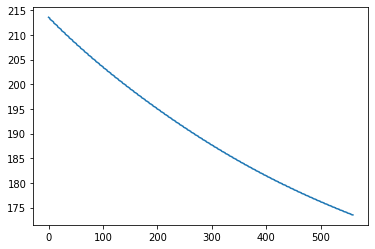

number of train samples: 13


/content/drive/My Drive/Colab Notebooks/Lazy courses/Markov Models/hmm_discrete_in_theano.py:81: UserWarning: DEPRECATION: If x is a vector, Softmax will not automatically pad x anymore in next releases. If you need it, please do it manually. The vector case is gonna be supported soon and the output will be a vector.
  pi = T.nnet.softmax(self.preSoftmaxPi).flatten()


it: 0
it: 1
it: 2
it: 3
it: 4
it: 5
it: 6
it: 7
it: 8
it: 9
it: 10
it: 11
it: 12
it: 13
it: 14
it: 15
it: 16
it: 17
it: 18
it: 19
it: 20
it: 21
it: 22
it: 23
it: 24
it: 25
it: 26
it: 27
it: 28
it: 29
it: 30
it: 31
it: 32
it: 33
it: 34
it: 35
it: 36
it: 37
it: 38
it: 39
it: 40
it: 41
it: 42
it: 43
it: 44
it: 45
it: 46
it: 47
it: 48
it: 49
it: 50
it: 51
it: 52
it: 53
it: 54
it: 55
it: 56
it: 57
it: 58
it: 59
it: 60
it: 61
it: 62
it: 63
it: 64
it: 65
it: 66
it: 67
it: 68
it: 69
it: 70
it: 71
it: 72
it: 73
it: 74
it: 75
it: 76
it: 77
it: 78
it: 79


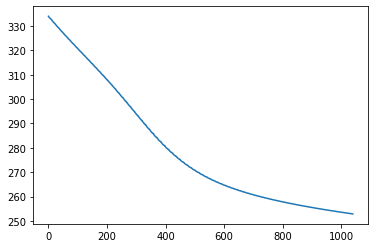

Score: 0.5


In [5]:
if __name__ == '__main__':
    main()